Quantum computers have many advantages over classical computers. One of the advantages is its superior speed searching in the databases. This ability can be demonstrated by using Grover's algorithm. For example, finding the needle in a haystack or searching the address of a people in a phone diary is an unstructured database search, and it takes a long time to find the correct solution. Grover's algorithm speeds up unstructured search probability quadratically by using the amplitude-amplification trick.

<img src="Images/Grovers algorithm.jpg" alt="drawing" width="600"/>


Let's consider a large list of $\mathrm{N}$ items. Among these items, there is one item with a unique property that we wish to locate, we will call this one the winner $(\mathrm{w})$. In a classical way, search for the winner item (w) needs to check 1 to $\mathrm{N}$ boxes. So, on average it needs to check $\mathrm{N} / 2$ boxes or steps.

But, using Grover's Algorithm, search steps can be reduced to $\sqrt{(} N$ ). So, it will be a substantial time-saver to find the marked items along with the list. Another advantage of this algorithm does not use the list's internal structure.

$\textbf{Example}$

To understand it, let's begin with 2 qubits list. Its total possible states will be $4\left(2^{2}=4\right.$ ). i.e, $00,01,10,11,$ In counting it will be $\mid 0>$ to upto $\mid 3>$.
Grover's algorithm solves oracles that add a negative phase to the solution states. i.e. for any states $|\mathrm{x}\rangle$ in the computational basis:
$$
U_{\omega}|x\rangle=\left\{\begin{array}{ll}
|x\rangle & \text { if } x \neq \omega \\
-|x\rangle & \text { if } x=\omega
\end{array}\right.
$$

Grover's algorithm has three main components. 
1. First, we begin by creating a superposition of all $2^n$ computational basis states by applying a Hadamard ($H$) gate on each qubit starting off in the state $\vert0\rangle^{\otimes n}$. Here, the exponent $\otimes n$ means that we have a tensor product of the states of $n$ qubits. 
2. Second, we apply an Oracle operator to mark the appropriate elements among the $2^n$ elements. The oracle operator applies a coefficient of $-1$ to each of the marked elements.
3. Third, we apply a Diffusion operator, or diffuser, which inverts the amplitude of all elements about the average amplitude.

Putting these components together, and applying the Oracle and Diffusion operators $O(\sqrt{N = 2^n})$ times, Grover's algorithm allows us to successfully determine the elements that were marked by the Oracle operator with high probability. This is shown in the block diagram above, where the quantum circuit for Grover's algorithm is depicted with a measurement in the end to read out the qubits.


In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit,Aer,execute
import math
from qiskit.tools.monitor import job_monitor        
pi = math.pi

STEP 1: INITIALISE THE QUANTUM AND CLASSICAL REGISTERS and CREATE THE CIRCUIT

In [2]:
q = QuantumRegister(4,'q')
c = ClassicalRegister(4,'c')
qc = QuantumCircuit(q,c)

$\textbf{STEP 2: APPLY A HADAMARD GATE TO ALL QUBITS}$

Then we need to apply a Hadamard gate. This gate is used to put a qubit in to a superposition of 1 and 0 such that when we measure the qubit it will be 1 or a 0 with equal probability.

In [3]:
qc.h(q)

$\textbf{STEP 3: CREATE THE ORACLE}$

Once all qubits are in superposition we can implement the oracle circuit. The oracle circuit inverts the amplitude of the state making it -1/4. This is done by first applying a Pauli X gate to certain qubits (depending on the state you wish to mark). 


In [4]:
### 0000 Oracle ###
qc1 = QuantumCircuit(q,c)
qc1.x(q[0])
qc1.x(q[1])
qc1.x(q[2])
qc1.x(q[3])

qc1.cu1(pi/4, q[0], q[3])
qc1.cx(q[0], q[1])
qc1.cu1(-pi/4, q[1], q[3])
qc1.cx(q[0], q[1])
qc1.cu1(pi/4, q[1], q[3])
qc1.cx(q[1], q[2])
qc1.cu1(-pi/4, q[2], q[3])
qc1.cx(q[0], q[2])
qc1.cu1(pi/4, q[2], q[3])
qc1.cx(q[1], q[2])
qc1.cu1(-pi/4, q[2], q[3])
qc1.cx(q[0], q[2])
qc1.cu1(pi/4, q[2], q[3])

qc1.x(q[0])
qc1.x(q[1])
qc1.x(q[2])
qc1.x(q[3])

### 0001 Oracle ###
qc2 = QuantumCircuit(q,c)
qc2.x(q[1])
qc2.x(q[2])
qc2.x(q[3])

qc2.cu1(pi/4, q[0], q[3])
qc2.cx(q[0], q[1])
qc2.cu1(-pi/4, q[1], q[3])
qc2.cx(q[0], q[1])
qc2.cu1(pi/4, q[1], q[3])
qc2.cx(q[1], q[2])
qc2.cu1(-pi/4, q[2], q[3])
qc2.cx(q[0], q[2])
qc2.cu1(pi/4, q[2], q[3])
qc2.cx(q[1], q[2])
qc2.cu1(-pi/4, q[2], q[3])
qc2.cx(q[0], q[2])
qc2.cu1(pi/4, q[2], q[3])

qc2.x(q[1])
qc2.x(q[2])
qc2.x(q[3])

### 0010 Oracle ###
qc3 = QuantumCircuit(q,c)
qc3.x(q[0])
qc3.x(q[2])
qc3.x(q[3])

qc3.cu1(pi/4, q[0], q[3])
qc3.cx(q[0], q[1])
qc3.cu1(-pi/4, q[1], q[3])
qc3.cx(q[0], q[1])
qc3.cu1(pi/4, q[1], q[3])
qc3.cx(q[1], q[2])
qc3.cu1(-pi/4, q[2], q[3])
qc3.cx(q[0], q[2])
qc3.cu1(pi/4, q[2], q[3])
qc3.cx(q[1], q[2])
qc3.cu1(-pi/4, q[2], q[3])
qc3.cx(q[0], q[2])
qc3.cu1(pi/4, q[2], q[3])

qc3.x(q[0])
qc3.x(q[2])
qc3.x(q[3])

### 0011 Oracle ###
qc4 = QuantumCircuit(q,c)
qc4.x(q[2])
qc4.x(q[3])

qc4.cu1(pi/4, q[0], q[3])
qc4.cx(q[0], q[1])
qc4.cu1(-pi/4, q[1], q[3])
qc4.cx(q[0], q[1])
qc4.cu1(pi/4, q[1], q[3])
qc4.cx(q[1], q[2])
qc4.cu1(-pi/4, q[2], q[3])
qc4.cx(q[0], q[2])
qc4.cu1(pi/4, q[2], q[3])
qc4.cx(q[1], q[2])
qc4.cu1(-pi/4, q[2], q[3])
qc4.cx(q[0], q[2])
qc4.cu1(pi/4, q[2], q[3])

qc4.x(q[2])
qc4.x(q[3])

### 0100 Oracle ###
qc5 = QuantumCircuit(q,c)
qc5.x(q[0])
qc5.x(q[1])
qc5.x(q[3])

qc5.cu1(pi/4, q[0], q[3])
qc5.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc5.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc5.cx(q[1], q[2])
qc5.cu1(-pi/4, q[2], q[3])
qc5.cx(q[0], q[2])
qc5.cu1(pi/4, q[2], q[3])
qc5.cx(q[1], q[2])
qc5.cu1(-pi/4, q[2], q[3])
qc5.cx(q[0], q[2])
qc5.cu1(pi/4, q[2], q[3])

qc5.x(q[0])
qc5.x(q[1])
qc5.x(q[3])

### 0101 Oracle ###
qc6 = QuantumCircuit(q,c)
qc6.x(q[1])
qc6.x(q[3])

qc6.cu1(pi/4, q[0], q[3])
qc6.cx(q[0], q[1])
qc6.cu1(-pi/4, q[1], q[3])
qc6.cx(q[0], q[1])
qc6.cu1(pi/4, q[1], q[3])
qc6.cx(q[1], q[2])
qc6.cu1(-pi/4, q[2], q[3])
qc6.cx(q[0], q[2])
qc6.cu1(pi/4, q[2], q[3])
qc6.cx(q[1], q[2])
qc6.cu1(-pi/4, q[2], q[3])
qc6.cx(q[0], q[2])
qc6.cu1(pi/4, q[2], q[3])

qc6.x(q[1])
qc6.x(q[3])

### 0110 Oracle ###
qc7 = QuantumCircuit(q,c)
qc7.x(q[0])
qc7.x(q[3])

qc7.cu1(pi/4, q[0], q[3])
qc7.cx(q[0], q[1])
qc7.cu1(-pi/4, q[1], q[3])
qc7.cx(q[0], q[1])
qc7.cu1(pi/4, q[1], q[3])
qc7.cx(q[1], q[2])
qc7.cu1(-pi/4, q[2], q[3])
qc7.cx(q[0], q[2])
qc7.cu1(pi/4, q[2], q[3])
qc7.cx(q[1], q[2])
qc7.cu1(-pi/4, q[2], q[3])
qc7.cx(q[0], q[2])
qc7.cu1(pi/4, q[2], q[3])

qc7.x(q[0])
qc7.x(q[3])

### 0111 Oracle ###
qc8 = QuantumCircuit(q,c)
qc8.x(q[3])

qc8.cu1(pi/4, q[0], q[3])
qc8.cx(q[0], q[1])
qc8.cu1(-pi/4, q[1], q[3])
qc8.cx(q[0], q[1])
qc8.cu1(pi/4, q[1], q[3])
qc8.cx(q[1], q[2])
qc8.cu1(-pi/4, q[2], q[3])
qc8.cx(q[0], q[2])
qc8.cu1(pi/4, q[2], q[3])
qc8.cx(q[1], q[2])
qc8.cu1(-pi/4, q[2], q[3])
qc8.cx(q[0], q[2])
qc8.cu1(pi/4, q[2], q[3])

qc8.x(q[3])

### 1000 Oracle ###
qc9 = QuantumCircuit(q,c)
qc9.x(q[0])
qc9.x(q[1])
qc9.x(q[2])

qc9.cu1(pi/4, q[0], q[3])
qc9.cx(q[0], q[1])
qc9.cu1(-pi/4, q[1], q[3])
qc9.cx(q[0], q[1])
qc9.cu1(pi/4, q[1], q[3])
qc9.cx(q[1], q[2])
qc9.cu1(-pi/4, q[2], q[3])
qc9.cx(q[0], q[2])
qc9.cu1(pi/4, q[2], q[3])
qc9.cx(q[1], q[2])
qc9.cu1(-pi/4, q[2], q[3])
qc9.cx(q[0], q[2])
qc9.cu1(pi/4, q[2], q[3])

qc9.x(q[0])
qc9.x(q[1])
qc9.x(q[2])

### 1001 Oracle ###
qct = QuantumCircuit(q,c)
qct.x(q[1])
qct.x(q[2])

qct.cu1(pi/4, q[0], q[3])
qct.cx(q[0], q[1])
qct.cu1(-pi/4, q[1], q[3])
qct.cx(q[0], q[1])
qct.cu1(pi/4, q[1], q[3])
qct.cx(q[1], q[2])
qct.cu1(-pi/4, q[2], q[3])
qct.cx(q[0], q[2])
qct.cu1(pi/4, q[2], q[3])
qct.cx(q[1], q[2])
qct.cu1(-pi/4, q[2], q[3])
qct.cx(q[0], q[2])
qct.cu1(pi/4, q[2], q[3])

qct.x(q[1])
qct.x(q[2])

### 1010 Oracle ###
qce = QuantumCircuit(q,c)
qce.x(q[0])
qce.x(q[2])

qce.cu1(pi/4, q[0], q[3])
qce.cx(q[0], q[1])
qce.cu1(-pi/4, q[1], q[3])
qce.cx(q[0], q[1])
qce.cu1(pi/4, q[1], q[3])
qce.cx(q[1], q[2])
qce.cu1(-pi/4, q[2], q[3])
qce.cx(q[0], q[2])
qce.cu1(pi/4, q[2], q[3])
qce.cx(q[1], q[2])
qce.cu1(-pi/4, q[2], q[3])
qce.cx(q[0], q[2])
qce.cu1(pi/4, q[2], q[3])

qce.x(q[0])
qce.x(q[2])

### 1011 Oracle ###
qcw = QuantumCircuit(q,c)
qcw.x(q[3])

qcw.cu1(pi/4, q[0], q[3])
qcw.cx(q[0], q[1])
qcw.cu1(-pi/4, q[1], q[3])
qcw.cx(q[0], q[1])
qcw.cu1(pi/4, q[1], q[3])
qcw.cx(q[1], q[2])
qcw.cu1(-pi/4, q[2], q[3])
qcw.cx(q[0], q[2])
qcw.cu1(pi/4, q[2], q[3])
qcw.cx(q[1], q[2])
qcw.cu1(-pi/4, q[2], q[3])
qcw.cx(q[0], q[2])
qcw.cu1(pi/4, q[2], q[3])

qcw.x(q[3])

### 1100 Oracle ###
qcr = QuantumCircuit(q,c)
qcr.x(q[0])
qcr.x(q[1])

qcr.cu1(pi/4, q[0], q[3])
qcr.cx(q[0], q[1])
qcr.cu1(-pi/4, q[1], q[3])
qcr.cx(q[0], q[1])
qcr.cu1(pi/4, q[1], q[3])
qcr.cx(q[1], q[2])
qcr.cu1(-pi/4, q[2], q[3])
qcr.cx(q[0], q[2])
qcr.cu1(pi/4, q[2], q[3])
qcr.cx(q[1], q[2])
qcr.cu1(-pi/4, q[2], q[3])
qcr.cx(q[0], q[2])
qcr.cu1(pi/4, q[2], q[3])

qcr.x(q[0])
qcr.x(q[1])

### 1101 Oracle ###
qcf = QuantumCircuit(q,c)
qcf.x(q[1])

qcf.cu1(pi/4, q[0], q[3])
qcf.cx(q[0], q[1])
qcf.cu1(-pi/4, q[1], q[3])
qcf.cx(q[0], q[1])
qcf.cu1(pi/4, q[1], q[3])
qcf.cx(q[1], q[2])
qcf.cu1(-pi/4, q[2], q[3])
qcf.cx(q[0], q[2])
qcf.cu1(pi/4, q[2], q[3])
qcf.cx(q[1], q[2])
qcf.cu1(-pi/4, q[2], q[3])
qcf.cx(q[0], q[2])
qcf.cu1(pi/4, q[2], q[3])

qcf.x(q[1])

### 1110 Oracle ###
qcv = QuantumCircuit(q,c)
qcv.x(q[0])

qcv.cu1(pi/4, q[0], q[3])
qcv.cx(q[0], q[1])
qcv.cu1(-pi/4, q[1], q[3])
qcv.cx(q[0], q[1])
qcv.cu1(pi/4, q[1], q[3])
qcv.cx(q[1], q[2])
qcv.cu1(-pi/4, q[2], q[3])
qcv.cx(q[0], q[2])
qcv.cu1(pi/4, q[2], q[3])
qcv.cx(q[1], q[2])
qcv.cu1(-pi/4, q[2], q[3])
qcv.cx(q[0], q[2])
qcv.cu1(pi/4, q[2], q[3])

qcv.x(q[0])

###1111 Oracle###
qcx = QuantumCircuit(q,c)
qcx.cu1(pi/4, q[0], q[3])
qcx.cx(q[0], q[1])
qcx.cu1(-pi/4, q[1], q[3])
qcx.cx(q[0], q[1])
qcx.cu1(pi/4, q[1], q[3])
qcx.cx(q[1], q[2])
qcx.cu1(-pi/4, q[2], q[3])
qcx.cx(q[0], q[2])
qcx.cu1(pi/4, q[2], q[3])
qcx.cx(q[1], q[2])
qcx.cu1(-pi/4, q[2], q[3])
qcx.cx(q[0], q[2])
qcx.cu1(pi/4, q[2], q[3])

The random circuit


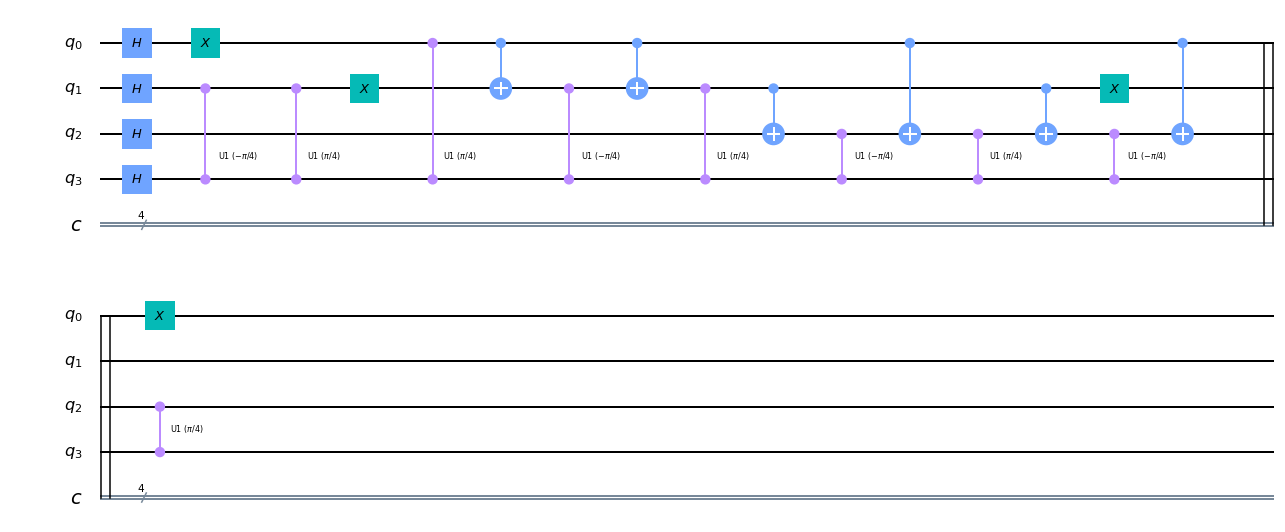

In [5]:
import random
list_options = [qc1, qc2, qc3, qc4, qc5, qc6,qc7,qc8,qc9,qct,qce,qcw,qcr,qcf,qcv,qcx,qcv,]
circuit_grovers = random.choice(list_options)

# Add the chosen circuit to the main circuit
qc += circuit_grovers

# Draw the circuit 
print("The random circuit")
qc.draw(output="mpl")

$\textbf{STEP 4: CREATE THE AMPLIFICATION CIRCUIT}$


Next we apply a amplification circuit. This raises the amplitude of the marked state while decreasing the amplitudes of all other states. 

In [6]:
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])

qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

In [7]:
qc.barrier(q)
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])

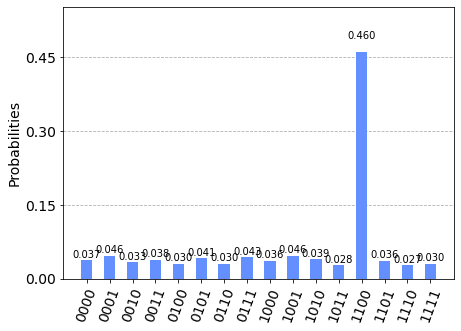

In [8]:
from qiskit.visualization import plot_histogram
simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=simulator, shots=1000).result().get_counts(qc)
plot_histogram(counts)